<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string
from collections import Counter
import squarify
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from spacy.tokenizer import Tokenizer

from bs4 import BeautifulSoup
import html as ihtml

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JimKing100/DS-Unit-4-Sprint-1-NLP/master/module2-vector-representations/data/job_listings.csv',
                 index_col=0)

In [3]:
df.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
df['description'][0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [5]:
def clean_text(text):
    text = text[1:]                               # remove first char 'b'
    text = text.replace('\\n', ' ')               # remove newline
    text = BeautifulSoup(text, "lxml").get_text() # remove html
    text = text.replace('/', ' ')                 # remove forward slashes
    text = re.sub(r'[^a-zA-Z ^0-9]', '', text)    # letters and numbers only
    text = text.lower()                           # lower case
    text = re.sub(r'(x.[0-9])', '', text)         # remove special characters
    return text

for i in range (0, len(df)):
    df['description'][i] = clean_text(df['description'][i])

In [6]:
df['description'][0]

'job requirements conceptual understanding in machine learning models like naive bayes kmeans svm apriori linear  logistic regression neural random forests decision trees knn along with handson experience in at least 2 of them intermediate to expert level coding skills in python r ability to write functions clean and efficient data manipulation are mandatory for this role exposure to packages like numpy scipy pandas matplotlib etc in python or ggplot2 dplyr tidyr in r ability to communicate model findings to both technical and nontechnical stake holders hands on experience in sql hive or similar programming language must show past work via github kaggle or any other published article masters degree in statistics mathematics computer science or any other quant specific field apply now'

In [7]:
df.head()

,description,title
0,job requirements conceptual understanding in m...,Data scientist
1,job description as a data scientist 1 you wil...,Data Scientist I
2,as a data scientist you will be working on con...,Data Scientist - Entry Level
3,4969 6756 a monthcontractunder the general su...,Data Scientist
4,location usa multiple locations 2 years of an...,Data Scientist


In [8]:
df['description'][0]

'job requirements conceptual understanding in machine learning models like naive bayes kmeans svm apriori linear  logistic regression neural random forests decision trees knn along with handson experience in at least 2 of them intermediate to expert level coding skills in python r ability to write functions clean and efficient data manipulation are mandatory for this role exposure to packages like numpy scipy pandas matplotlib etc in python or ggplot2 dplyr tidyr in r ability to communicate model findings to both technical and nontechnical stake holders hands on experience in sql hive or similar programming language must show past work via github kaggle or any other published article masters degree in statistics mathematics computer science or any other quant specific field apply now'

## 2) Use Spacy to tokenize / clean the listings 

In [9]:
nlp = spacy.load("en_core_web_lg")

tokenizer = Tokenizer(nlp.vocab)

In [10]:
STOP_WORDS = nlp.Defaults.stop_words.union(['datum', 'year', 'apply', 'understand', 'work',
                                            'opportunity', 'new', 'use', 'ability', 'company',
                                            'include'])

In [11]:
# Tokenizer pipe removing stop words and blank words and lemmatizing
tokens = []

for doc in tokenizer.pipe(df['description']):
    
    doc_tokens = []
    for token in doc:
        if (token.lemma_ not in STOP_WORDS) & (token.text != ' '):
            doc_tokens.append(token.lemma_)

    tokens.append(doc_tokens)

df['tokens'] = tokens
df['tokens'].head()

0    [job, requirement, conceptual, machine, learn,...
1    [job, description, scientist, 1, help, build, ...
2    [scientist, consult, business, responsible, an...
3    [4969, 6756, monthcontractunder, general, supe...
4    [location, usa, multiple, location, 2, analyti...
Name: tokens, dtype: object

In [12]:
# Create a count function
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')


In [13]:
# Create a word count dataframe
wc = count(df['tokens'])
wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
33,experience,410,1999,1.0,0.016486,0.016486,0.962441
77,team,370,1363,2.0,0.011240,0.027726,0.868545
224,business,324,1251,3.0,0.010317,0.038043,0.760563
69,model,330,1248,4.0,0.010292,0.048335,0.774648
28,learn,343,1065,5.0,0.008783,0.057118,0.805164
27,science,338,978,6.0,0.008065,0.065183,0.793427
139,product,275,892,7.0,0.007356,0.072540,0.645540
166,analysis,317,812,8.0,0.006696,0.079236,0.744131
311,analytics,249,732,9.0,0.006037,0.085273,0.584507
211,build,295,721,10.0,0.005946,0.091219,0.692488


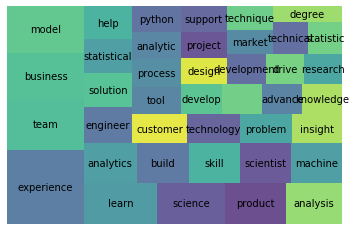

In [14]:
# Graph the word count
wc_top20 = wc[wc['rank'] <= 40]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [15]:
# Function to use spacy tokenizer
def tokenize(document):    
    doc = nlp(document)   
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and 
                                                     (token.is_punct != True) and
                                                     (token.text != ' ')]

In [16]:
from sklearn.feature_extraction import text 

# create the transformer (instantiate)
vect = CountVectorizer(tokenizer=tokenize, stop_words=STOP_WORDS)

# tokenize and build vocab (fit)
vect.fit(df['description'])

# transform text (transform)
dtm = vect.transform(df['description'])

# Get Word Counts for each document
dtm_wc = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm_wc.head()

/Users/JKMacBook/opt/anaconda3/envs/nlp-1/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['d', 'm', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,,-PRON-,0,00,02,02115,03,030,030547069,04,...,zf,zfs,zheng,zillow,zogsport,zone,zoom,zuckerberg,zurich,zurichs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [17]:
sum_words = dtm.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:10] 

[('experience', 1936),
 ('team', 1363),
 ('business', 1251),
 ('science', 978),
 ('product', 892),
 ('model', 866),
 ('data', 843),
 ('analytic', 837),
 ('analysis', 811),
 ('skill', 720)]

In [18]:
cv_top20 = pd.DataFrame(words_freq[:20]) 
cv_top20.head()

,0,1
0,experience,1936
1,team,1363
2,business,1251
3,science,978
4,product,892


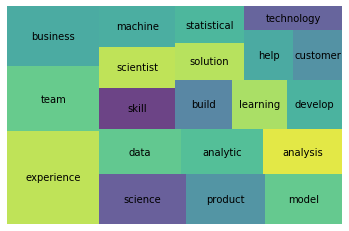

In [19]:
squarify.plot(sizes=cv_top20[1], label=cv_top20[0], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [20]:
# create the transformer (instantiate)
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words=STOP_WORDS)

# tokenize and build vocab (fit)
tfidf.fit(df['description'])

# transform text (transform)
dtm = tfidf.transform(df['description'])

# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.head()

,,-PRON-,0,00,02,02115,03,030,030547069,04,...,zf,zfs,zheng,zillow,zogsport,zone,zoom,zuckerberg,zurich,zurichs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.110293,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [21]:
# Instantiate
from sklearn.neighbors import NearestNeighbors

# Fit on TF-IDF Vectors
nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [22]:
ideal_job = ["""The ideal job would include python, sql, and machine learning in the real estate field"""]

In [23]:
# Query for Sim of Random doc to BBC
new = tfidf.transform(ideal_job)

nn.kneighbors(new.todense())

(array([[1.26849197, 1.31247315, 1.31247315, 1.31742174, 1.31898546,
         1.33336737, 1.34264351, 1.34747481, 1.3476852 , 1.35215874]]),
 array([[127, 344, 197, 408, 244, 200, 283,  31, 237, 276]]))

In [24]:
df['description'][127]

'null associate data scientist  tenx commercial  tenx commercial is the cre marketplace that is a force multiplier for sellers buyers and brokers tenx precisionmatches assets accelerates close rates and streamlines the entire transaction process with more than 55 billion in sales and increasing daily leveraging desktop and mobile technology tenx allows people to safely and easily complete real estate transactions entirely online we bring quality assets to the market and attract prospective investors from around the world by virtue of our bestinclass marketing and scalable technology platform buyers and seller are able to conduct transactions in an efficient manner  tenx empowers consumers investors and real estate professionals with unprecedented levels of flexibility control and simplicity  and the convenience of transacting properties whenever and wherever they want as real estate continues to move online tenx is uniquely positioned at the forefront of this dramatic industry evolutio

In [25]:
df['description'][344]

'reonomy is leveraging the power of data and technology to transform the worlds largest asset class  commercial real estate by structuring the world of property people and company data were able to deliver actionable insights to our customers  headquartered in new york reonomy has raised 70 million from top investors including sapphire ventures bain capital softbank and primary ventures our clients represent the biggest names in cre including newmark knight frank cushman  wakefield tishman speyer and wework  if youre excited by growth innovation and the ability to shape one of the biggest markets join us as our journey is just beginning  about the role  as a data scientist at reonomy you will play a vital role as your models will be critical components embedded in the pipelines that support everything we offer we are creating a bestinclass data infrastructure which intelligently links disparate datasets at scale as well as to manage the complexities of commercial real estate in order t

In [26]:
df['description'][408]

'finlocker is a leading financial data and analytics company we focus on analyzing consumer financial data such as assets income employment taxes credit liabilities real estate and more you will be responsible for designing and implementing the models and analyses for the function of a x9cvirtual financial advisorx9d for the consumer our office is located in clayton mo with remote employees throughout the us  this is a fulltime position that will be based in our clayton st louis office  salary is competitive to relevant experience  key qualifications  6 years experience of applying machine learning techniques optimization and statistics to drive key decisions extensive handson experience with development of predictive models and machine learning aibased solutions solid programming skills in python r or similar data science language advanced proficiency in data visualization prefer financial services industry experience prefer experience in crm financial analysis financial advisory bach

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 

In [27]:
import requests
import time

In [28]:
URL = "https://www.indeed.com/jobs?q=data+scientist+%24120%2C000&l=San+Francisco%2C+CA"
#conducting a request of the stated URL above:
page = requests.get(URL)
#specifying a desired format of “page” using the html parser - this allows python to read the various components of the page, rather than treating it as one long string.
soup = BeautifulSoup(page.text, "html.parser")
#printing soup in a more structured tree format that makes for easier reading
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <script src="/s/cb2751b/en_US.js" type="text/javascript">
  </script>
  <script>
   window.indeed=window.indeed||{};indeed.crashtext=indeed.crashtext||{};indeed.crashtext.populate=indeed.crashtext.populate||function(c,g){var d=window[g];if(d){var e=d[""]||{},h=e.salt;if(e.hasOwnProperty("salt"))for(var b in c){for(var a=void 0,a=h,f=b.length;f;)a=33*a^b.charCodeAt(--f);a>>>=0;e.hasOwnProperty("id_length")&&(a=String(a).substring(0,e.id_length));d[a]=c[b]}else for(b in c)d[b]=[null].concat(c[b])}};indeed.crashtext.populate({"Save jobs and view them from any computer.":["Not ready now? Save job and remind me later."],"You must sign in to save jobs:":["Sign in to save:"]}, 'indeed.i18n.localeData')
  </script>
  <link href="/s/b066150/jobsearch_all.css" rel="stylesheet" type="text/css"/>
  <link href="http://rss.indeed.com/rss?q=data+scientist+%24120%2C000&amp;l=San+F

In [29]:
def extract_job_title(soup):
    jobs = []
    for div in soup.find_all(name="div", attrs={"class":"row"}):
        for a in div.find_all(name="a", attrs={"data-tn-element":"jobTitle"}):
            jobs.append(a["title"])
    return(jobs)

extract_job_title(soup)

['Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Software Engineer, Machine Learning',
 'Data Scientist',
 'Data Scientist (Jr. to Sr. Level)',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Geospatial Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Staff Data Scientist',
 'Geospatial Data Scientist',
 'Data Scientist - Financial Technology Start Up!',
 'Data Scientist']

In [30]:
def extract_company(soup):
    companies = []
    for div in soup.find_all(name="div", attrs={"class":"row"}):
        company = div.find_all(name="span", attrs={"class":"company"})
        if len(company) > 0:
            for b in company:
                companies.append(b.text.strip())
        else:
            sec_try = div.find_all(name="span", attrs={"class":"result-linl-source"})
            for span in sec_try:
                companies.append(span.text.strip())
    return(companies)

extract_company(soup)

['Blue Owl',
 'Calance US',
 'Shutterfly',
 'Grammarly',
 'University of California San Francisco',
 'Piper Companies',
 'Unlearn.AI',
 'Woodruff Sawyer',
 'Spin',
 'Esurance',
 'Gap Inc.',
 'Uber',
 'Ceres Imaging',
 'Jobot',
 'Perfect World Entertainment']

In [31]:
def extract_location(soup):
    locations = []
    for div in soup.find_all(name="div", attrs={"class":"row"}):
        try:
            locations.append(div.find(name="span", attrs={"class":"location"}).text)
        except:
            locations.append("None")
    return(locations)

extract_location(soup)

['None',
 'None',
 'None',
 'None',
 'San Francisco, CA 94143 (Inner Sunset area)',
 'San Francisco, CA 94107 (South Of Market area)',
 'San Francisco, CA',
 'San Francisco, CA 94111 (Financial District area)',
 'San Francisco, CA',
 'San Francisco Bay Area, CA',
 'San Francisco, CA 94105 (Financial District area)',
 'San Francisco, CA 94105 (Financial District area)',
 'San Francisco, CA 94105 (Financial District area)',
 'Oakland, CA',
 'None',
 'None']

In [32]:
def extract_salary(soup):
    salaries = []
    for div in soup.find_all(name="div", attrs={"class":"row"}):
        try:
            salaries.append(div.find(name="span", attrs={"class":"salaryText"}).text.replace("\n",""))
        except:
            salaries.append("None")
    return(salaries)

extract_salary(soup)

['$200,000 - $350,000 a year',
 'None',
 'None',
 'None',
 'None',
 '$120,000 - $220,000 a year',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 '$120,000 - $160,000 a year',
 'None']

In [33]:
def extract_summary(soup):
    summaries = []
    for div1 in soup.find_all(name="div", attrs={"class":"row"}):
        for div2 in div1.find_all(name="div", attrs={"class":"summary"}):
            for li in div2:
                summaries.append(li)
    return(summaries)

extract_summary(soup)

['\n',
 <ul style="list-style-type:circle;margin-top: 0px;margin-bottom: 0px;padding-left:20px;"> <li style="margin-bottom:0px;">The data science team builds the data-driven features of the company.</li><li style="margin-bottom:0px;">Requirements for all data scientists.</li><li>Qualified for one of the the specializations below.</li></ul>,
 '\n',
 <ul style="list-style-type:circle;margin-top: 0px;margin-bottom: 0px;padding-left:20px;"> <li>As a full stack health care company of physicians, engineers, marketers and more under one roof, Clients collects comprehensive data on our patients’ experience…</li></ul>,
 '\n',
 <ul style="list-style-type:circle;margin-top: 0px;margin-bottom: 0px;padding-left:20px;"> <li>The Data Scientist will be responsible for designing and directing experiments and observational studies to optimize our marketing efforts.</li></ul>,
 '\n',
 <ul style="list-style-type:circle;margin-top: 0px;margin-bottom: 0px;padding-left:20px;"> <li style="margin-bottom:0px;">

In [34]:
def extract_job_title(soup):
    jobs = []
    for div in soup.find_all(name="div", attrs={"class":"row"}):
        for a in div.find_all(name="a", attrs={"data-tn-element":"jobTitle"}):
            jobs.append(a["title"])
    return(jobs)

extract_job_title(soup)

['Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Software Engineer, Machine Learning',
 'Data Scientist',
 'Data Scientist (Jr. to Sr. Level)',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Geospatial Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Staff Data Scientist',
 'Geospatial Data Scientist',
 'Data Scientist - Financial Technology Start Up!',
 'Data Scientist']

In [44]:
def extract_url(soup):
    urls = []
    for div1 in soup.find_all(name="div", attrs={"class":"row"}):
        for div2 in div1.find_all(name="div", attrs={"class":"title"}):
            for a in div2.find_all(name="a", href=True):
                urls.append(a['href'])
    return(urls)

def extract_desc(urls):
    descs = []
    for url in urls:
        full_url = "https://www.indeed.com" + url
        detail_page = requests.get(full_url)
        detail_soup = BeautifulSoup(detail_page.text, "html.parser")
        
        for div in detail_soup.find_all(name="div", attrs={"id":"jobDescriptionText"}):
            descs.append(div.text)
    return(descs)

add_urls = extract_url(soup)
detail_data = extract_desc(add_urls)
print(detail_data)

["A million people a year die in car collisions around the world and we want that number to be zero. We invite you to help us build an InsurTech company that uses rich customer insights, advanced technology, and data science to save lives by preventing car collisions before they happen. We recently launched our first product, hiroad.com, a cloud native insurance solution that rewards people for the act of driving well.\n\nWith impressive funding, a compelling vision, and a world-class team, we're poised to re-engineer a trillion-dollar category from the ground up- and that's just where we're beginning. Longer term, we're out to change behavior and promote mindful living at a societal level.\n\nThe data science team builds the data-driven features of the company.\nRequirements for all data scientists\nDemonstrable expertise building and supporting machine learning models deployed to production\nExpert in Python and core libraries used by data scientists (Numpy, Scipy, Pandas, Scikit-lea

In [56]:
max_results = 500
title_name = "data+scientist"
city_name = "San+Francisco"
st_name = "CA"
columns = ["city", "job_title", "company", "location", "salary", "description"]


for start in range(0, max_results, 10):
    city_url = "https://www.indeed.com/jobs?q=" + title_name + \
               "&l=" + city_name + "%2C+" + st_name + \
               "&start=" + str(start)
    print(city_url)
    page = requests.get(city_url)
    soup = BeautifulSoup(page.text, "html.parser")

    job_title_list.extend(extract_job_title(soup))
    company_list.extend(extract_company(soup))
    location_list.extend(extract_location(soup))
    salary_list.extend(extract_salary(soup))
    add_urls = extract_url(soup)
    desc_list.extend(extract_desc(add_urls))
    
indeed_df = pd.DataFrame(list(zip(job_title_list, company_list, location_list, 
                                  salary_list, desc_list)), 
                         columns = ['job_title', 'company', 'location', 'salary', 'description'])



https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=0
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=10
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=20
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=30
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=40
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=50
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=60
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=70
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=80
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=90
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=100
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=110
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=120
https://ww

,job_title,company,location,salary,description
0,Data Analyst/Data Scientist,Quicken Inc.,None,None,Quicken is committed to helping people lead he...
1,Machine Learning Engineer,Upstart,"San Mateo, CA",None,Upstart is the first lending platform to lever...
2,Data Scientist,Everlane,"San Francisco, CA 94110 (Mission area)",None,"Data Scientist\nSan Francisco, CA\nData Scienc..."
3,Data Scientist (Senior Associate) - Industry P...,Rocky Mountain Institute,"Oakland, CA",None,Please apply at:https://rmi.synchr-recruit.com...
4,Machine Learning Engineer,Hive,"San Francisco, CA 94109 (Nob Hill area)",None,About Hive\n\nHive is a full-stack deep learni...
5,"Summer Intern, Statistical Programming, Biomet...",Ultragenyx Pharmaceutical,"Novato, CA 94949",None,Why Join Us?\nBe a hero for our rare disease p...
6,Applied Scientist,"Twitch Interactive, Inc.","San Francisco, CA",None,Hands-on experience in developing algorithms o...
7,Applied ML Engineer,Determined AI,"San Francisco, CA",None,As an Applied Machine Learning Engineer at Det...
8,"Senior Data Scientist, Engineering",Credit Karma,"San Francisco, CA 94104 (Financial District area)",None,"Credit Karma is a mission-driven company, focu..."
9,"Principal, Data Scientist",2K Games,"Novato, CA 94949",None,Who We Are:\n\n\n2K develops and publishes int...


In [57]:
indeed_df.tail(100)

,job_title,company,location,salary,description
996,Data Scientist,Glassdoor,None,"$200,000 - $350,000 a year",A million people a year die in car collisions ...
997,Lead Machine Learning Scientist,Quantum Leap Healthcare,None,None,The Role\n\nYou'll be part of a very fast-grow...
998,Statistical Programmer,Triplebyte,None,None,Statistical programmer is responsible for load...
999,Machine Learning Engineer,Freedom Financial Network,None,"$125,000 - $190,000 a year",About TriplebyteTriplebyte helps companies fin...
1000,Senior Data Scientist,Seen by Indeed,None,None,WHO WE ARE:\nFreedom Financial Network is a fa...
1001,Data Scientist,Turo,None,None,With one application you can be considered for...
1002,"Senior Data Analyst, Product",super{set} startup studio,"San Francisco, CA",None,Turo is seeking a Senior Data Analyst to join ...
1003,Senior Data Science Engineer,Twitter,"San Francisco, CA 94108 (Financial District area)",None,Join our team @ Eskalera! A super{set} venture...
1004,Staff Machine Learning Engineer - Recommendati...,Autodesk,"San Francisco, CA 94103 (South Of Market area)",None,Who We Are:\n\nRecos Platform team builds reco...
1005,"Intern, Artificial Intelligence (AI) Research",Skydio,"San Francisco, CA 94105 (Financial District area)",None,Autodesk’s AI Lab is looking for 2020 Summer i...
